In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [32]:
df = pd.read_excel("lc.xlsx")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [34]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [36]:
del df["GENDER"]

In [37]:
df["LUNG_CANCER"] = df["LUNG_CANCER"].map({"YES": 1, "NO": 0})

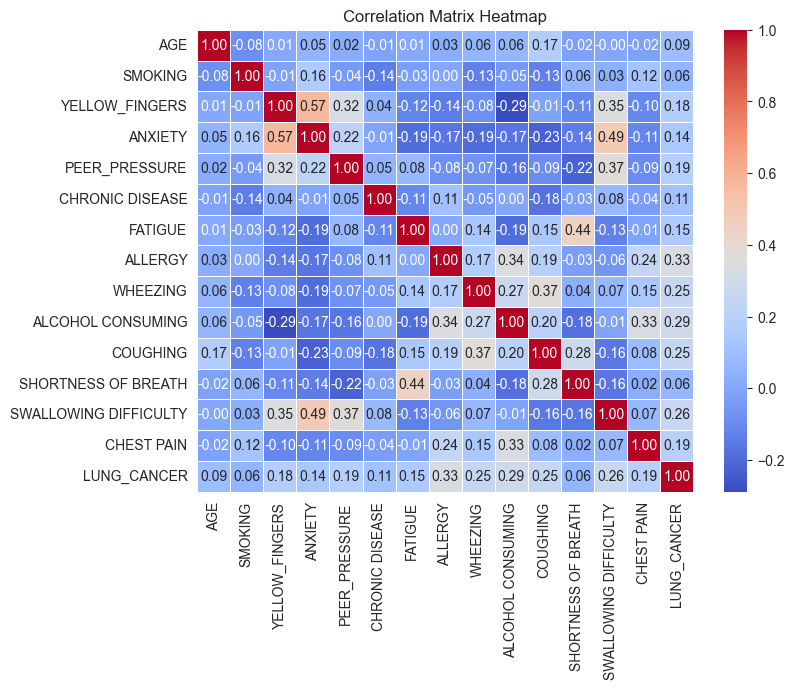

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
def predict_output(algorithm, X_train, y_train, x_test, y_test):
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(x_test)
    return accuracy_score(y_test, y_pred).__round__(3)

In [40]:
def splitting_dataset(method,dataframe):
    X = pd.DataFrame(df.iloc[:, 0:len(df.columns) - 1])
    y = dataframe.iloc[:, len(df.columns) - 1]
    LogisticRegression_accuracy = []
    DecisionTree_accuracy = []
    SupportVectorMachine_accuracy = []
    KNearestNeighbors_accuracy = []
    NaiveBayes_accuracy = []
    
    for train_index, test_index in method.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        logistic_regression = LogisticRegression(max_iter=5000)
        LogisticRegression_accuracy.append(predict_output(logistic_regression, X_train, y_train, X_test, y_test))
        decision_tree = DecisionTreeClassifier()
        DecisionTree_accuracy.append(predict_output(decision_tree, X_train, y_train, X_test, y_test))
    
        support_vector_machine = LinearSVC(max_iter=10000, dual=False)
        SupportVectorMachine_accuracy.append(predict_output(support_vector_machine, X_train, y_train, X_test, y_test))
    
        knn = KNeighborsClassifier(n_neighbors=5)
        KNearestNeighbors_accuracy.append(predict_output(knn, X_train, y_train, X_test, y_test))
    
        naive_bayes = MultinomialNB()
        NaiveBayes_accuracy.append(predict_output(naive_bayes, X_train, y_train, X_test, y_test))
        
    print("Logistic Regression Accuracy: ", np.mean(LogisticRegression_accuracy))
    print("Decision Tree Accuracy: ", np.mean(DecisionTree_accuracy))
    print("Support Vector Machine Accuracy: ", np.mean(SupportVectorMachine_accuracy))
    print("K-Nearest Neighbors Accuracy: ", np.mean(KNearestNeighbors_accuracy))
    print("Naive Bayes Accuracy: ", np.mean(NaiveBayes_accuracy))
    print("Max Accuracy of logistic regression", np.max(LogisticRegression_accuracy))
    print("Max Accuracy of decision tree", np.max(DecisionTree_accuracy))
    print("Max Accuracy of support vector machine", np.max(SupportVectorMachine_accuracy))
    print("Max Accuracy of k-nearest neighbors", np.max(KNearestNeighbors_accuracy))
    print("Max Accuracy of naive bayes", np.max(NaiveBayes_accuracy))


# Stratified K-Fold Cross Validation with 5 splits

In [41]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splitting_dataset(stratified_split,df)

Logistic Regression Accuracy:  0.9096
Decision Tree Accuracy:  0.8741999999999999
Support Vector Machine Accuracy:  0.9029999999999999
K-Nearest Neighbors Accuracy:  0.874
Naive Bayes Accuracy:  0.8737999999999999
Max Accuracy of logistic regression 0.984
Max Accuracy of decision tree 0.951
Max Accuracy of support vector machine 0.967
Max Accuracy of k-nearest neighbors 0.902
Max Accuracy of naive bayes 0.885


# K-Fold Cross Validation with 5 splits

In [42]:
KFSplit = KFold(n_splits=5, shuffle=True, random_state=42)
splitting_dataset(KFSplit,df)

Logistic Regression Accuracy:  0.8932
Decision Tree Accuracy:  0.8997999999999999
Support Vector Machine Accuracy:  0.8932
K-Nearest Neighbors Accuracy:  0.8737999999999999
Naive Bayes Accuracy:  0.874
Max Accuracy of logistic regression 0.968
Max Accuracy of decision tree 0.952
Max Accuracy of support vector machine 0.968
Max Accuracy of k-nearest neighbors 0.952
Max Accuracy of naive bayes 0.968


# Repeated K-Fold Cross Validation with 5 splits

In [43]:
RKFSplit = RepeatedKFold(n_splits=5,  random_state=42)
splitting_dataset(RKFSplit,df)

Logistic Regression Accuracy:  0.9180200000000001
Decision Tree Accuracy:  0.8827399999999999
Support Vector Machine Accuracy:  0.90314
K-Nearest Neighbors Accuracy:  0.8766399999999999
Naive Bayes Accuracy:  0.87382
Max Accuracy of logistic regression 0.984
Max Accuracy of decision tree 0.968
Max Accuracy of support vector machine 0.968
Max Accuracy of k-nearest neighbors 0.984
Max Accuracy of naive bayes 0.968
